In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'Eval_combined_df.csv'  # Change this to your local file path
eval_combined_df = pd.read_csv(file_path, index_col=0)

eval_combined_df.head()

,input,category,"('FEW_SHOT', 'llama3:latest')","('FEW_SHOT', 'mistral:latest')","('FEW_SHOT', 'phi3:latest')","('ONE_SHOT', 'llama3:latest')","('ONE_SHOT', 'mistral:latest')","('ONE_SHOT', 'phi3:latest')","('ZERO_SHOT', 'llama3:latest')","('ZERO_SHOT', 'mistral:latest')","('ZERO_SHOT', 'phi3:latest')"
0,Which customer made the highest purchase this ...,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales
1,How many units were sent for repair this month?,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance
2,What was the most frequently ordered product l...,Inventory Management,Inventory Management,Inventory Management,Sales,Inventory Management,Inventory Management,Sales,Sales,Inventory Management,Sales
3,Which sales representative has the highest sal...,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales
4,How many scheduled maintenance activities are ...,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance


In [2]:
# Fonction pour calculer les correspondances
def calculate_percentage_matches(df, total_rows):
    matches = {}
    for col in df.columns[2:]:
        matches[col] = (df[col] == df['category']).sum() / total_rows * 100
    return matches

# Calculer les correspondances en pourcentage
total_rows = len(eval_combined_df)
matches = calculate_percentage_matches(eval_combined_df, total_rows)

# Convertir les correspondances en DataFrame pour faciliter la visualisation
matches_df = pd.DataFrame(list(matches.items()), columns=['Method_Model', 'Percentage'])

# Afficher le DataFrame des correspondances
print(matches_df)

                      Method_Model  Percentage
0    ('FEW_SHOT', 'llama3:latest')   98.932384
1   ('FEW_SHOT', 'mistral:latest')   97.508897
2      ('FEW_SHOT', 'phi3:latest')   92.882562
3    ('ONE_SHOT', 'llama3:latest')   87.900356
4   ('ONE_SHOT', 'mistral:latest')   95.729537
5      ('ONE_SHOT', 'phi3:latest')   92.526690
6   ('ZERO_SHOT', 'llama3:latest')   89.679715
7  ('ZERO_SHOT', 'mistral:latest')   97.508897
8     ('ZERO_SHOT', 'phi3:latest')   87.544484


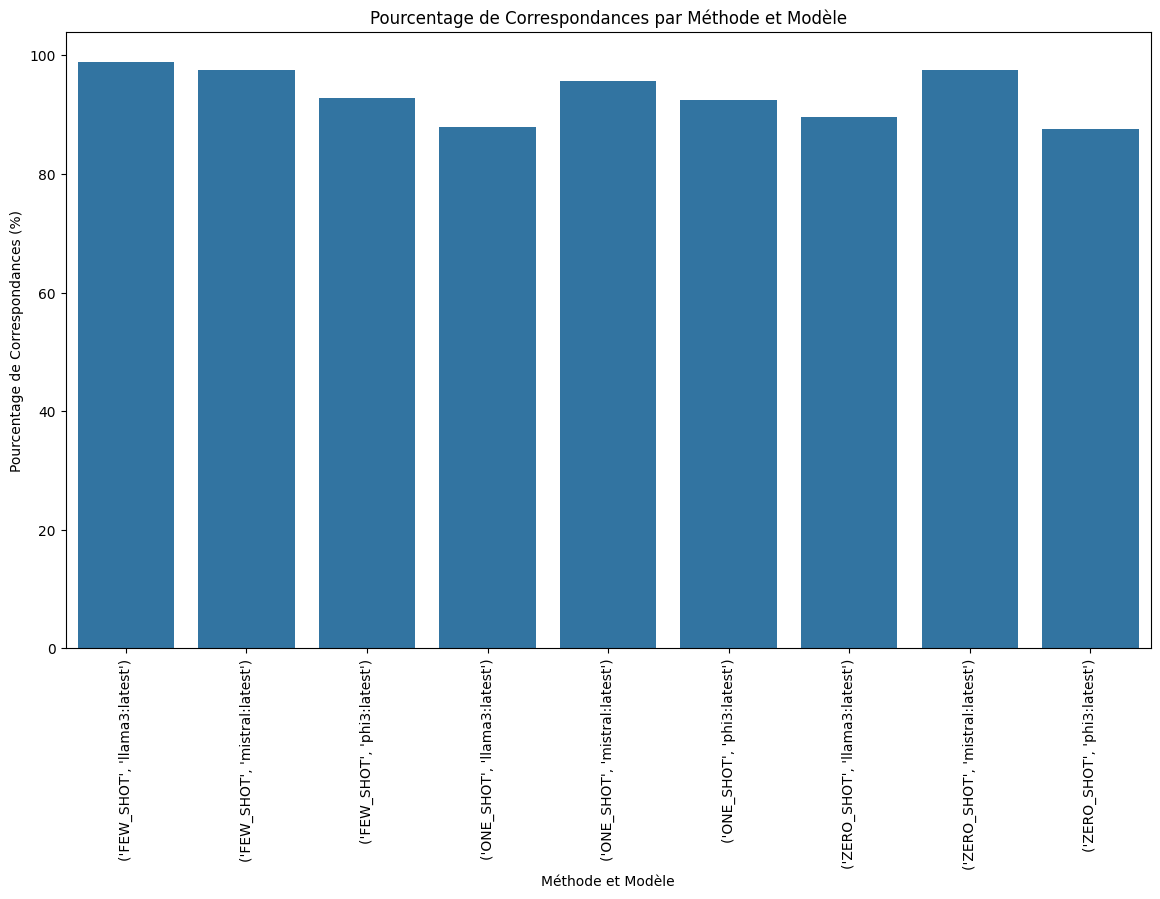

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour tracer les correspondances
def plot_matches(df):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Method_Model', y='Percentage', data=df)
    plt.title('Pourcentage de Correspondances par Méthode et Modèle')
    plt.xticks(rotation=90)
    plt.xlabel('Méthode et Modèle')
    plt.ylabel('Pourcentage de Correspondances (%)')
    plt.show()

# Tracer les correspondances
plot_matches(matches_df)

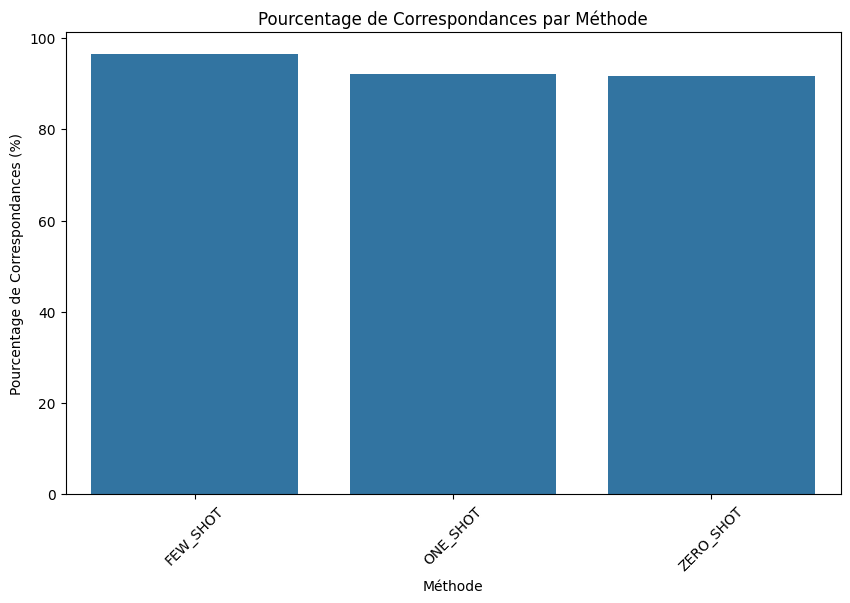

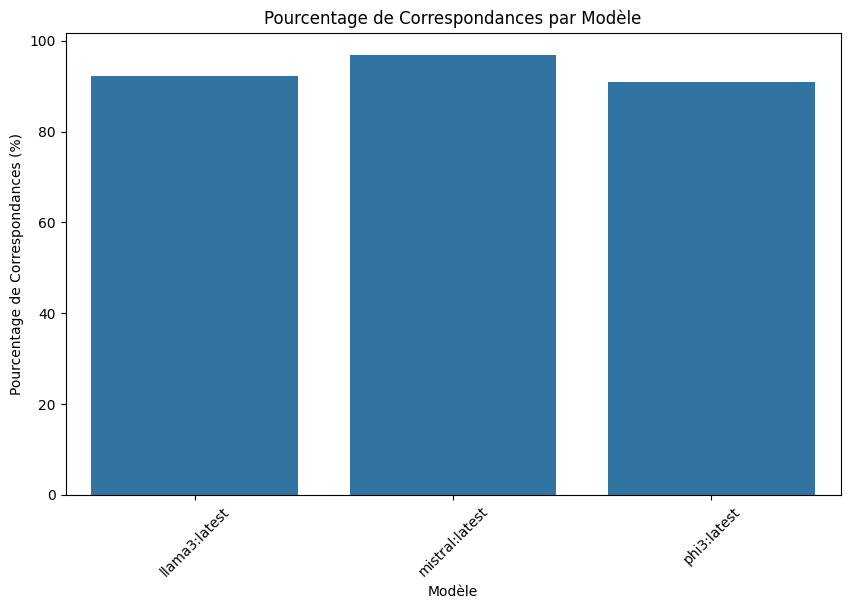

In [4]:
# Convertir les correspondances en DataFrame pour faciliter la visualisation
matches_df = pd.DataFrame(list(matches.items()), columns=['Method_Model', 'Percentage'])

# Séparer les données par méthode et par modèle
matches_df[['Method', 'Model']] = matches_df['Method_Model'].str.extract(r"\('(.+)', '(.+)'\)")
method_df = matches_df.groupby('Method')['Percentage'].mean().reset_index()
model_df = matches_df.groupby('Model')['Percentage'].mean().reset_index()

# Fonction pour tracer les correspondances par méthode
def plot_method_matches(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Method', y='Percentage', data=df)
    plt.title('Pourcentage de Correspondances par Méthode')
    plt.xticks(rotation=45)
    plt.xlabel('Méthode')
    plt.ylabel('Pourcentage de Correspondances (%)')
    plt.show()

# Fonction pour tracer les correspondances par modèle
def plot_model_matches(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Percentage', data=df)
    plt.title('Pourcentage de Correspondances par Modèle')
    plt.xticks(rotation=45)
    plt.xlabel('Modèle')
    plt.ylabel('Pourcentage de Correspondances (%)')
    plt.show()

# Tracer les correspondances par méthode
plot_method_matches(method_df)

# Tracer les correspondances par modèle
plot_model_matches(model_df)